In [54]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [55]:
data = [{"technique" : "linear regression",
         "assumes_linearity" : True,
         "purpose" : "estimation",
         "assumes_independence" : True
        },
        {"technique" : "logistic regression",
         "assumes_linearity" : True,
         "purpose" : "estimation",
         "assumes_independence" : True
        },
        {"technique" : "logistic regression",
         "assumes_linearity" : True,
         "purpose" : "classification",
         "assumes_independence" : True
        },
        {"technique" : "decision tree",
         "assumes_linearity" : False,
         "purpose" : "classification",
         "assumes_independence" : False
        },
        {"technique" : "decision tree",
         "assumes_linearity" : True,
         "purpose" : "estimation",
         "assumes_independence" : False
        },
        {"technique" : "random forest",
         "assumes_linearity" : False,
         "purpose" : "classification",
         "assumes_independence" : False
        },
        {"technique" : "random forest",
         "assumes_linearity" : False,
         "purpose" : "estimation",
         "assumes_independence" : False
        },
        {"technique" : "random forest",
         "assumes_linearity" : False,
         "purpose" : "discovery",
         "assumes_independence" : False
        },
        {"technique" : "random forest",
         "assumes_linearity" : False,
         "purpose" : "classification",
         "assumes_independence" : False
        },
        {"technique" : "svm",
         "assumes_linearity" : False,
         "purpose" : "classification",
         "assumes_independence" : False
        },
        {"technique" : "k-means",
         "assumes_linearity" : False,
         "purpose" : "discovery",
         "assumes_independence" : False
        },
        {"technique" : "knn",
         "assumes_linearity" : False,
         "purpose" : "classification",
         "assumes_independence" : False
        },
        {"technique" : "nbayes",
         "assumes_linearity" : False,
         "purpose" : "classification",
         "assumes_independence" : False
        },
        {"technique" : "nbayes",
         "assumes_linearity" : False,
         "purpose" : "estimation",
         "assumes_independence" : False
        }
       ]

data

# Is time a variable? (ARIMA)
# Do you have more than one class for classification? (LDA)
# Are you comparing distributions? (t-test)
# Discovery -- Factor Analysis? PCA?
# Neural Network
# Do you have computational constraints?
# Do you want your model to be interpretable, or performant?


[{'assumes_independence': True,
  'assumes_linearity': True,
  'purpose': 'estimation',
  'technique': 'linear regression'},
 {'assumes_independence': True,
  'assumes_linearity': True,
  'purpose': 'estimation',
  'technique': 'logistic regression'},
 {'assumes_independence': True,
  'assumes_linearity': True,
  'purpose': 'classification',
  'technique': 'logistic regression'},
 {'assumes_independence': False,
  'assumes_linearity': False,
  'purpose': 'classification',
  'technique': 'decision tree'},
 {'assumes_independence': False,
  'assumes_linearity': True,
  'purpose': 'estimation',
  'technique': 'decision tree'},
 {'assumes_independence': False,
  'assumes_linearity': False,
  'purpose': 'classification',
  'technique': 'random forest'},
 {'assumes_independence': False,
  'assumes_linearity': False,
  'purpose': 'estimation',
  'technique': 'random forest'},
 {'assumes_independence': False,
  'assumes_linearity': False,
  'purpose': 'discovery',
  'technique': 'random forest

In [56]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [57]:
X = [[k["assumes_linearity"], k["purpose"], k["assumes_independence"]] for k in data]
Y = [k["technique"] for k in data]
X

[[True, 'estimation', True],
 [True, 'estimation', True],
 [True, 'classification', True],
 [False, 'classification', False],
 [True, 'estimation', False],
 [False, 'classification', False],
 [False, 'estimation', False],
 [False, 'discovery', False],
 [False, 'classification', False],
 [False, 'classification', False],
 [False, 'discovery', False],
 [False, 'classification', False],
 [False, 'classification', False],
 [False, 'estimation', False]]

In [58]:
lex0 = preprocessing.LabelEncoder()
lex0.fit([x[0] for x in X])
lex1 = preprocessing.LabelEncoder()
lex1.fit([x[1] for x in X])
lex2 = preprocessing.LabelEncoder()
lex2.fit([x[2] for x in X])
ley = preprocessing.LabelEncoder()
ley.fit(Y)
Xt = [list(z) for z in zip(lex0.transform([x[0] for x in X]), lex1.transform([x[1] for x in X]), lex2.transform([x[2] for x in X]))]
Yt = ley.transform(Y)
#list(ley.classes_)
#le.transform(["estimation", "classification", "estimation"]) 
#list(le.inverse_transform([0, 0, 1]))

In [59]:
clf = clf.fit(Xt, Yt)

In [7]:
#with open("iris.dot", 'w') as f:
#    f = tree.export_graphviz(clf, out_file=f)

In [53]:
# import pydotplus 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("iris.pdf")

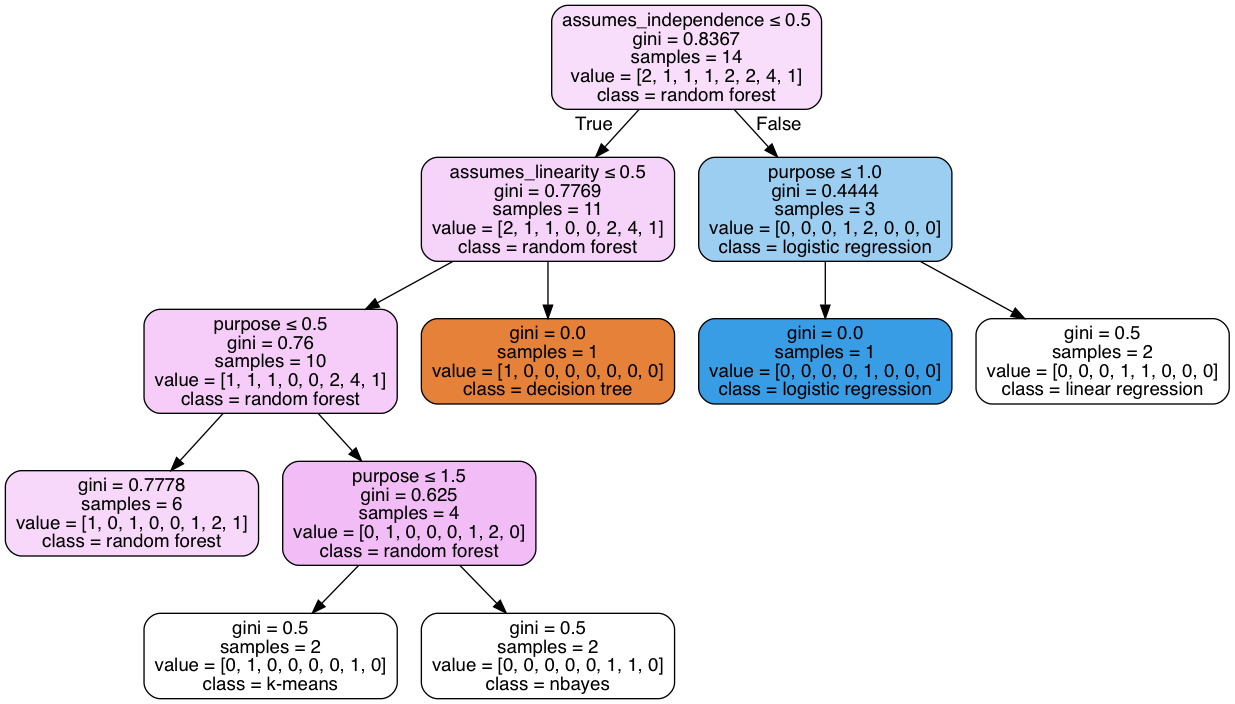

In [60]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=["assumes_linearity", "purpose", "assumes_independence"],
                         class_names=ley.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [36]:
#dot_data

In [61]:
print clf.tree_.compute_feature_importances()
# Interesting!

[ 0.23358289  0.31294118  0.45347594]


In [52]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
# clf.tree_.__getstate__()

In [43]:
# http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [62]:
import numpy as np
get_code(clf, ["assumes_linearity", "purpose", "assumes_independence"],ley.classes_)

if ( assumes_independence <= 0.5 ) {
    if ( assumes_linearity <= 0.5 ) {
        if ( purpose <= 0.5 ) {
            return decision tree ( 1 examples )
            return knn ( 1 examples )
            return nbayes ( 1 examples )
            return random forest ( 2 examples )
            return svm ( 1 examples )
        }
        else {
            if ( purpose <= 1.5 ) {
                return k-means ( 1 examples )
                return random forest ( 1 examples )
            }
            else {
                return nbayes ( 1 examples )
                return random forest ( 1 examples )
            }
        }
    }
    else {
        return decision tree ( 1 examples )
    }
}
else {
    if ( purpose <= 1.0 ) {
        return logistic regression ( 1 examples )
    }
    else {
        return linear regression ( 1 examples )
        return logistic regression ( 1 examples )
    }
}
